In [1]:
cd C:\Users\tul18813\Desktop\BigGeo\AppDev\data

C:\Users\tul18813\Desktop\BigGeo\AppDev\data


In [9]:
ls

 Volume in drive C is Windows
 Volume Serial Number is D2FF-7C7B

 Directory of C:\Users\tul18813\Desktop\BigGeo\AppDev\data

02/21/2024  07:32 PM    <DIR>          .
02/21/2024  07:32 PM    <DIR>          ..
02/12/2024  11:00 PM    <DIR>          .ipynb_checkpoints
02/21/2024  07:09 PM                 5 cb_2022_us_tract_500k.cpg
02/21/2024  07:09 PM        40,463,325 cb_2022_us_tract_500k.dbf
02/21/2024  07:09 PM               165 cb_2022_us_tract_500k.prj
02/21/2024  07:09 PM        82,323,812 cb_2022_us_tract_500k.shp
02/21/2024  07:09 PM            22,098 cb_2022_us_tract_500k.shp.ea.iso.xml
02/21/2024  07:09 PM            47,324 cb_2022_us_tract_500k.shp.iso.xml
02/21/2024  07:09 PM           681,580 cb_2022_us_tract_500k.shx
02/12/2024  04:48 PM            12,794 nlcd_tcc_conus_2021_v2021-4.aux
02/12/2024  04:48 PM     3,740,410,153 nlcd_tcc_conus_2021_v2021-4.tif
02/12/2024  04:48 PM            28,721 nlcd_tcc_conus_2021_v2021-4.tif.aux.xml
02/12/2024  04:48 PM            50,081

In [2]:
import rasterio
import fiona

In [3]:
nlcd_file = 'nlcd_tcc_conus_2021_v2021-4.tif'
nlcd_dataset = rasterio.open(nlcd_file)

In [10]:
import geopandas as gpd

tracts_shapefile = 'tracts.shp'
tracts_gdf = gpd.read_file(tracts_shapefile)

In [28]:
tract_name = input("Enter the name of the tract: ")

# Filter the states GeoDataFrame based on the user input
selected_tract = tracts_gdf[tracts_gdf['NAME'] == tract_name]

Enter the name of the tract:  997.03


In [29]:
from rasterio.mask import mask

# Extract the geometry of the selected state
geometry = selected_tract.geometry.values[0]

# Clip the NLCD dataset based on the geometry of the selected state
clipped_nlcd, _ = mask(nlcd_dataset, [geometry], crop=True)

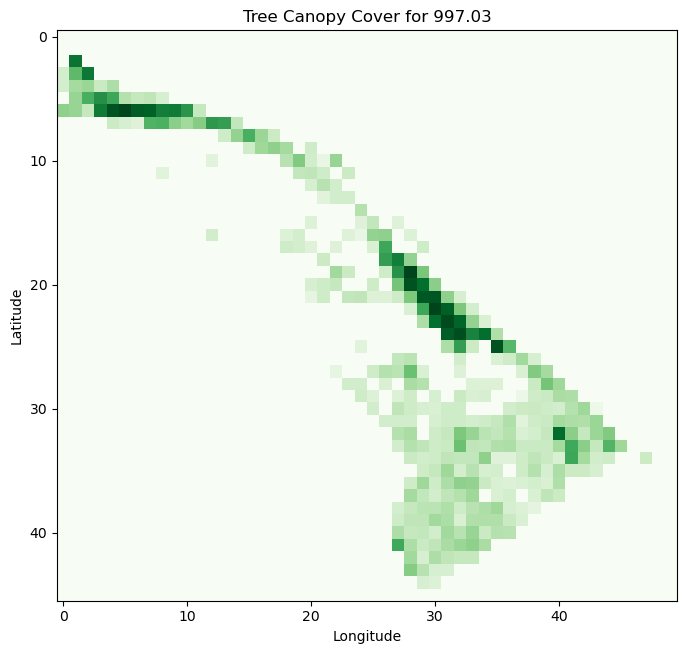

In [30]:
import matplotlib.pyplot as plt
from rasterio.plot import show

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Visualize the clipped NLCD data
show(clipped_nlcd, ax=ax, cmap='Greens')

# Add title
ax.set_title('Tree Canopy Cover for {}'.format(state_name))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()